In [11]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import struct

In [12]:
file_path1 = '/Users/tagirgalimov/Desktop/Петрофизика-2сем/28.DAT'
file_path2 = '/Users/tagirgalimov/Desktop/Петрофизика-2сем/89.DAT'

with open(file_path1, "rb") as file:
    file.seek(7*4)
    buffer_size = (3792-7*4)//4
    data = file.read(buffer_size*4)
    format_string = f'{buffer_size}I' 
    unpacked_dat1 = struct.unpack(format_string, data)

with open(file_path2, "rb") as file:
    file.seek(7*4)
    buffer_size = (3792-7*4)//4
    data = file.read(buffer_size*4)
    format_string = f'{buffer_size}I' 
    unpacked_dat2 = struct.unpack(format_string, data)
               
print(unpacked_dat1)    

(70, 52, 50, 58, 50, 51, 59, 52, 54, 56, 52, 57, 57, 54, 48, 38, 36, 44, 42, 34, 38, 36, 40, 50, 49, 46, 45, 48, 48, 43, 36, 32, 35, 36, 34, 30, 35, 37, 37, 42, 38, 32, 32, 37, 42, 45, 38, 34, 33, 30, 31, 30, 32, 32, 26, 39, 39, 26, 31, 38, 34, 32, 30, 25, 26, 28, 36, 34, 25, 28, 31, 28, 25, 26, 26, 28, 26, 25, 28, 32, 32, 34, 34, 30, 30, 29, 28, 28, 26, 26, 24, 28, 35, 29, 26, 27, 31, 36, 33, 24, 22, 20, 23, 27, 24, 24, 26, 26, 22, 18, 22, 24, 23, 27, 27, 22, 24, 28, 26, 22, 24, 22, 23, 31, 29, 23, 22, 22, 24, 24, 16, 15, 22, 20, 23, 24, 23, 20, 18, 24, 21, 22, 24, 26, 30, 26, 23, 22, 19, 18, 18, 22, 19, 20, 23, 20, 24, 28, 24, 20, 25, 24, 22, 20, 18, 18, 20, 20, 16, 16, 22, 25, 24, 24, 26, 24, 21, 20, 18, 20, 25, 23, 18, 20, 19, 19, 20, 20, 24, 22, 16, 16, 18, 19, 20, 15, 14, 22, 22, 19, 19, 16, 22, 30, 27, 22, 22, 22, 20, 21, 22, 22, 20, 18, 14, 20, 24, 22, 18, 16, 18, 18, 19, 18, 17, 22, 20, 20, 22, 16, 14, 16, 18, 20, 18, 20, 20, 18, 18, 22, 27, 26, 22, 21, 22, 23, 22, 20, 26, 28,

In [13]:
angle = np.arange(1.5, 1.5 + 0.025 * len(unpacked_dat2), 0.025)


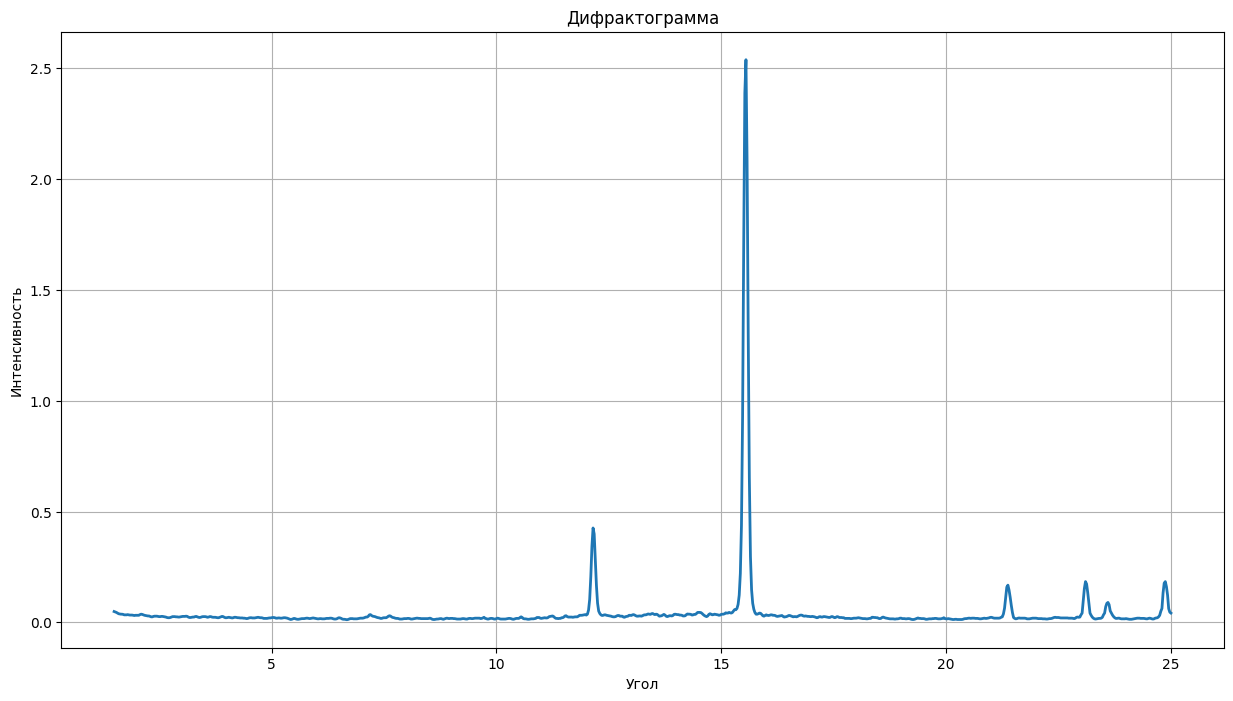

In [14]:
plt.figure(figsize=(15,8))
spectrum1 = np.array([i/1000 for i in unpacked_dat1])    
plt.plot(angle, spectrum, lw = 2)

plt.xlabel('Угол')
plt.ylabel('Интенсивность')
plt.title('Дифрактограмма')

plt.grid()

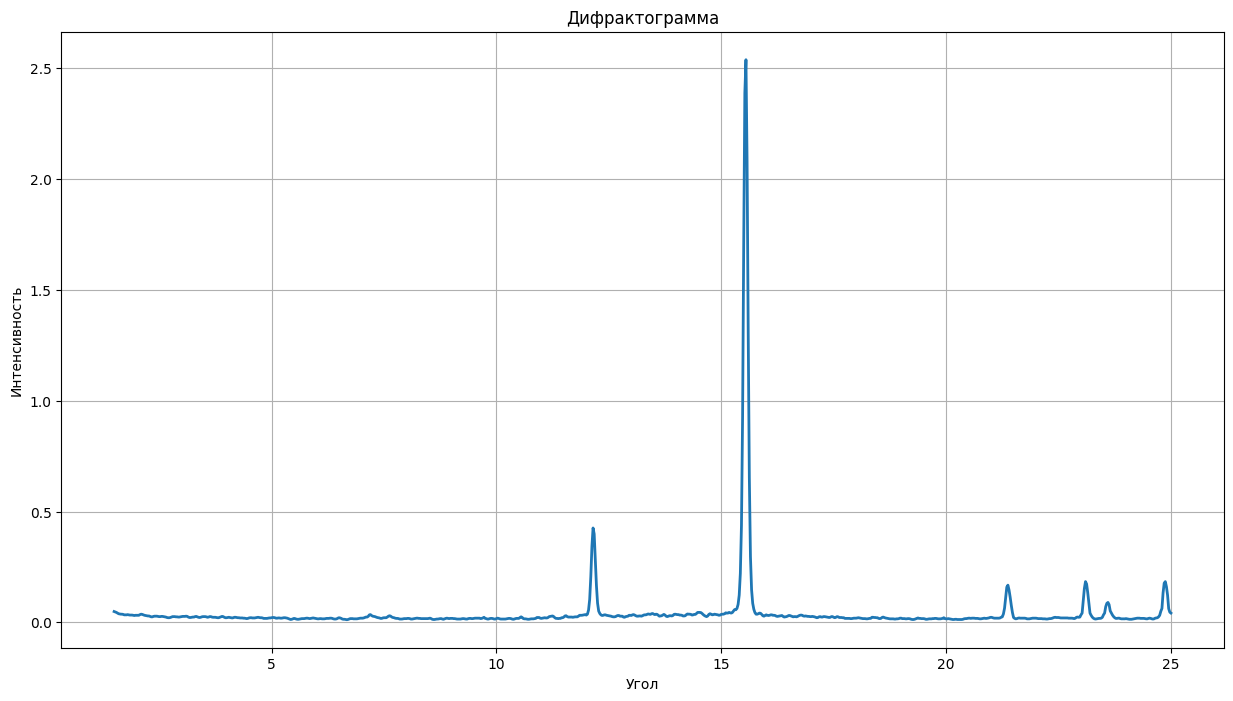

In [15]:
plt.figure(figsize=(15,8))
spectrum2 = np.array([i/1000 for i in unpacked_dat2])    
plt.plot(angle, spectrum, lw = 2)

plt.xlabel('Угол')
plt.ylabel('Интенсивность')
plt.title('Дифрактограмма')

plt.grid()

In [41]:
peaks1, _ = find_peaks(np.diff(unpacked_dat1), height=13, distance=5)
peaks2, _ = find_peaks(np.diff(unpacked_dat2), height=13, distance=5)

peaks1 = peaks1[1:] + 2
peaks2 = peaks2 + 2
print(peaks1)

[424 560 625 779 792 861 881 933]


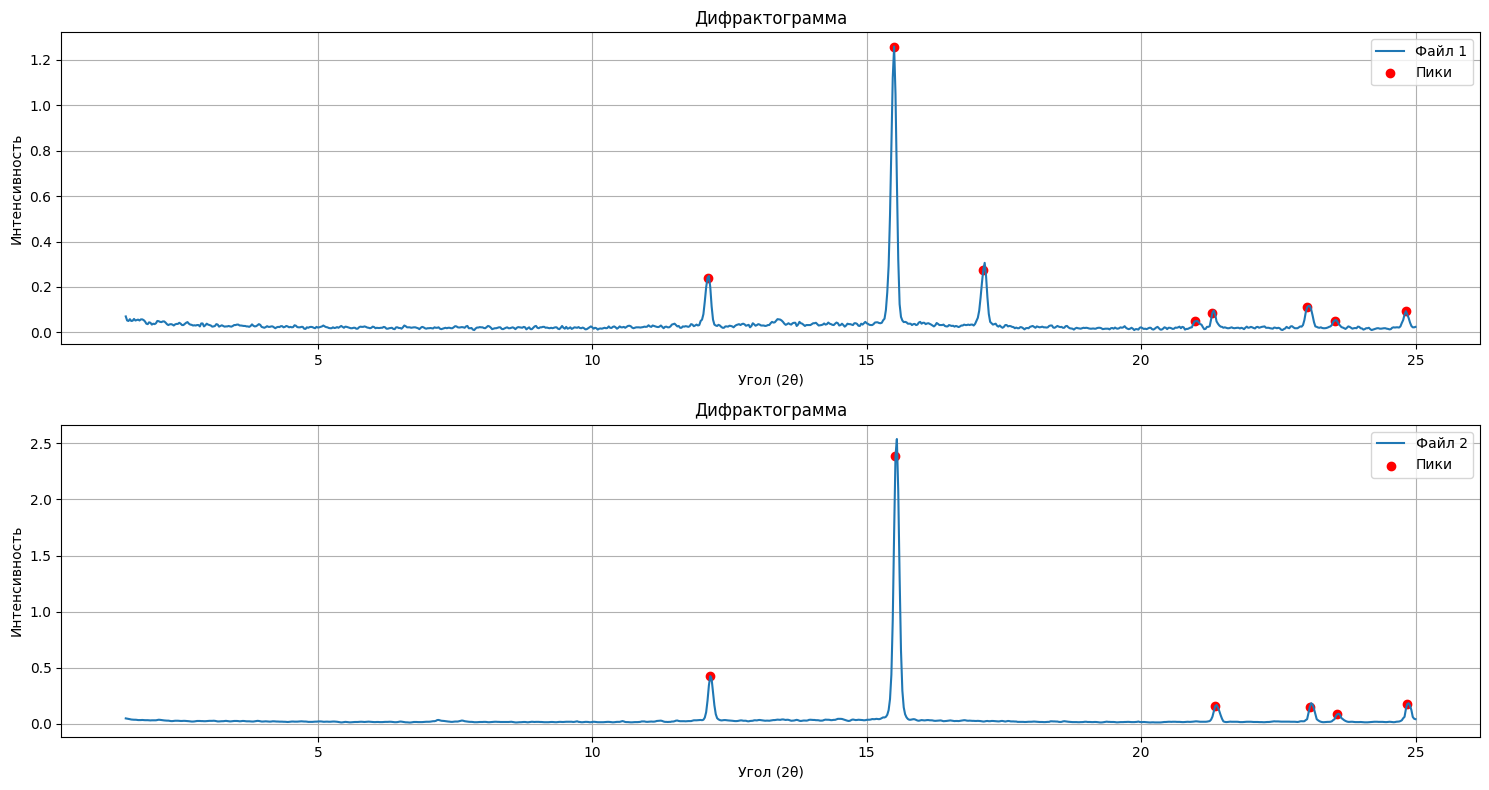

In [43]:
fig, axs = plt.subplots(2, 1, figsize=(15, 8))

axs[0].plot(angle, spectrum1, label="Файл 1")
axs[0].scatter(angle[peaks1], spectrum1[peaks1], c="r", label="Пики")

axs[1].plot(angle, spectrum2, label="Файл 2")
axs[1].scatter(angle[peaks2], spectrum2[peaks2], c="r", label="Пики")

for ax in axs:
    ax.set_xlabel("Угол (2θ)")
    ax.set_ylabel("Интенсивность")
    ax.set_title("Дифрактограмма")
    ax.legend()
    ax.grid()

fig.tight_layout()
plt.show()

In [74]:
def sliding(data, length=40):
    fon = np.zeros_like(data)

    for i in range(len(data)):
        if i + length + 1 > len(data):
            break

        first = data[i]
        last = data[i + length]
        if last > first:
            step = (last - first) / length
            segment = np.arange(first, last, step)
        elif last < first:
            step = (first - last) / length
            segment = np.arange(last, first, step)
        elif abs(last - first) < 1e-5:
            segment = [first for _ in range(length)]

        part_spectrum = data[i : i + length]

        for j in range(length):
            if part_spectrum[j] > segment[j]:
                fon[i + j] = segment[j]
            else:
                fon[i + j] = part_spectrum[j]

    return fon

In [72]:
noise_28 = sliding(spectrum1)
noise_89 = sliding(spectrum2)

[0.038   0.032   0.032   0.037   0.042   0.045   0.038   0.034   0.033
 0.03    0.031   0.03    0.032   0.032   0.026   0.038   0.036   0.026
 0.031   0.034   0.034   0.032   0.03    0.025   0.026   0.028   0.036
 0.034   0.025   0.028   0.031   0.028   0.025   0.026   0.026   0.028
 0.026   0.025   0.028   0.032   0.032   0.032   0.032   0.03    0.03
 0.029   0.028   0.028   0.026   0.026   0.024   0.028   0.032   0.029
 0.026   0.027   0.031   0.026   0.031   0.024   0.022   0.02    0.023
 0.025   0.024   0.024   0.026   0.026   0.022   0.018   0.022   0.024
 0.023   0.026   0.026   0.022   0.024   0.025   0.026   0.022   0.024
 0.022   0.023   0.03    0.029   0.023   0.022   0.022   0.024   0.024
 0.016   0.015   0.022   0.02    0.023   0.024   0.023   0.02    0.018
 0.024   0.021   0.02    0.023   0.026   0.024   0.024   0.023   0.022
 0.019   0.018   0.018   0.022   0.019   0.02    0.023   0.02    0.024
 0.028   0.024   0.02    0.024   0.022   0.022   0.02    0.018   0.018
 0.02  

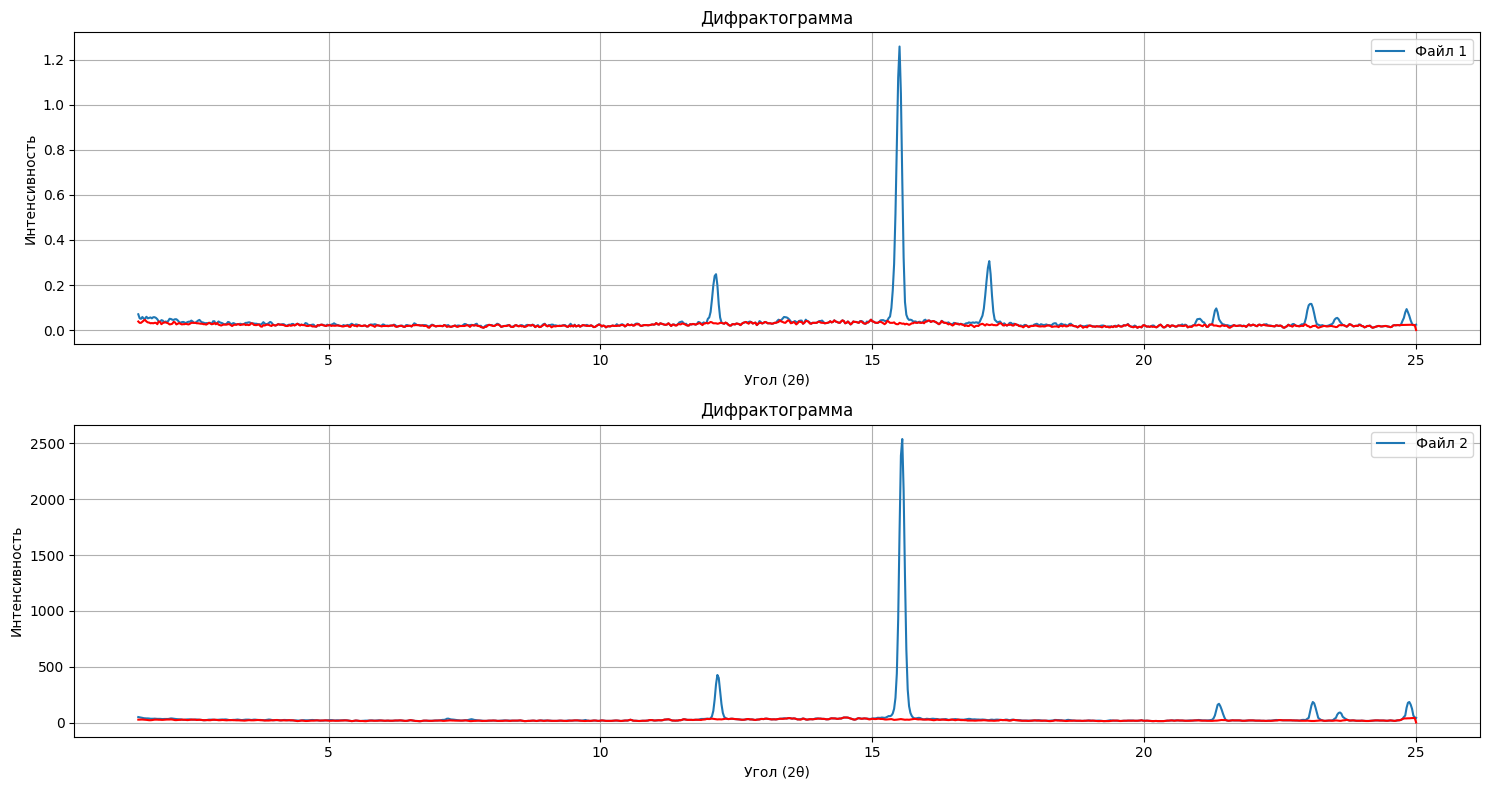

In [73]:
fig, axs = plt.subplots(2, 1, figsize=(15, 8))

axs[0].plot(angle, spectrum1, label="Файл 1")
axs[0].plot(angle, noise_28, c="r")

axs[1].plot(angle, spectrum2, label="Файл 2")
axs[1].plot(angle, noise_89, c="r")

for ax in axs:
    ax.set_xlabel("Угол (2θ)")
    ax.set_ylabel("Интенсивность")
    ax.set_title("Дифрактограмма")
    ax.legend()
    ax.grid()

fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Эталонный импульс')

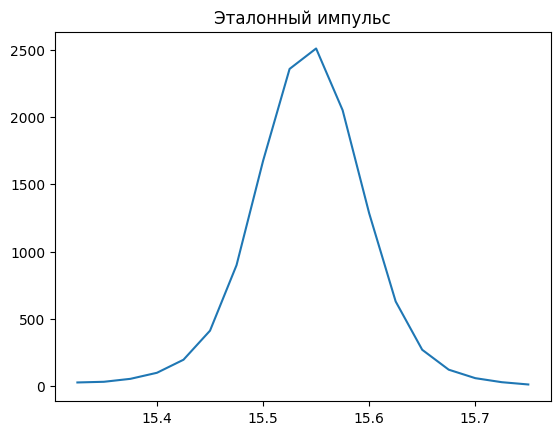

In [77]:
standard_impulse = unpacked_dat2[peaks2[1]-8:peaks2[1]+10] - noise_89[peaks2[1]-8:peaks2[1]+10]
standard_angles = angle[peaks2[1]-8:peaks2[1]+10]
plt.plot(standard_angles, standard_impulse)
plt.title("Эталонный импульс")

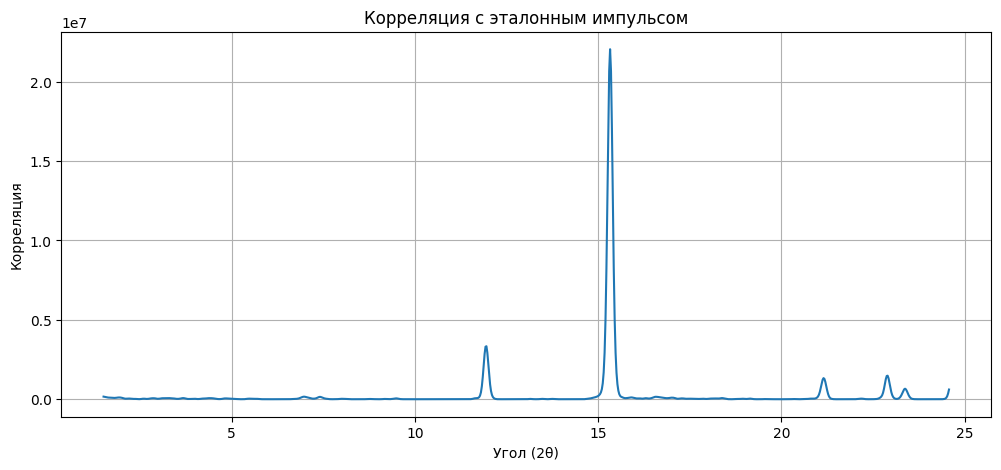

In [78]:
corr_89 = np.correlate(unpacked_dat2 - noise_89, standard_impulse, mode='valid')

corr_angles = angle[:len(corr_89)]

plt.figure(figsize=(12, 5))
plt.plot(corr_angles, corr_89)
plt.xlabel("Угол (2θ)")
plt.ylabel("Корреляция")
plt.title("Корреляция с эталонным импульсом")
plt.grid()
plt.show()
